In [4]:
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis de entrada
temperatura_ambiente = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura_ambiente')
clima = ctrl.Antecedent(np.arange(0, 101, 1), 'clima')

# Variável de saída
temperatura = ctrl.Consequent(np.arange(0, 41, 1), 'temperatura')

In [5]:

# Funções de pertinência para temperatura ambiente
temperatura_ambiente['fria'] = fuzz.trapmf(temperatura_ambiente.universe, [0,0, 15, 20])
temperatura_ambiente['moderada'] = fuzz.trimf(temperatura_ambiente.universe, [15, 20, 25])
temperatura_ambiente['quente'] = fuzz.trapmf(temperatura_ambiente.universe, [20, 25, 40, 40])

# Funções de pertinência para clima
clima['chuvoso'] = fuzz.trapmf(clima.universe, [0, 0, 40, 50])
clima['nublado'] = fuzz.trimf(clima.universe, [40, 50, 60])
clima['ensolarado'] = fuzz.trapmf(clima.universe, [50, 60, 100, 100])

# Funções de pertinência para temperatura da piscina
temperatura['fria'] = fuzz.trapmf(temperatura.universe, [0, 0, 15, 20])
temperatura['ideal'] = fuzz.trimf(temperatura.universe, [15, 20, 25])
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [20, 25, 40, 40])

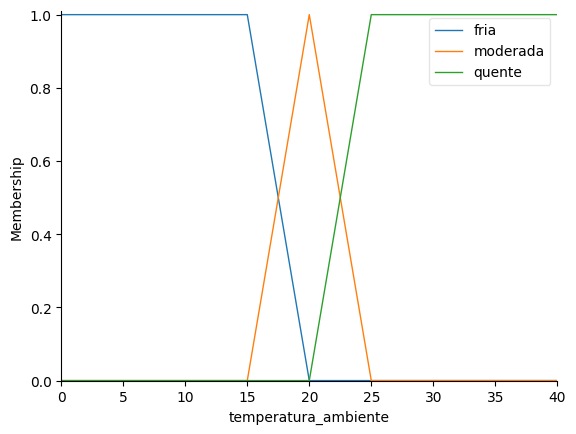

In [6]:
temperatura_ambiente.view()

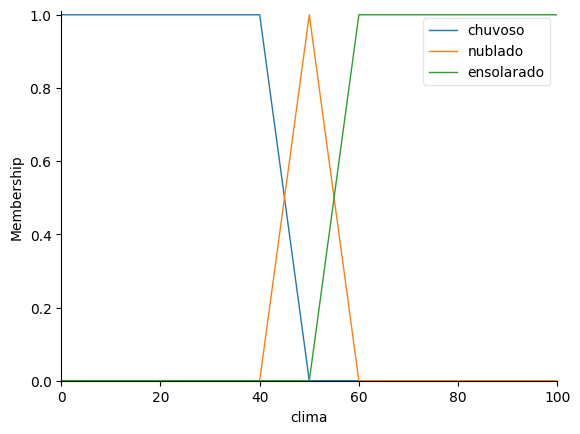

In [7]:
clima.view()

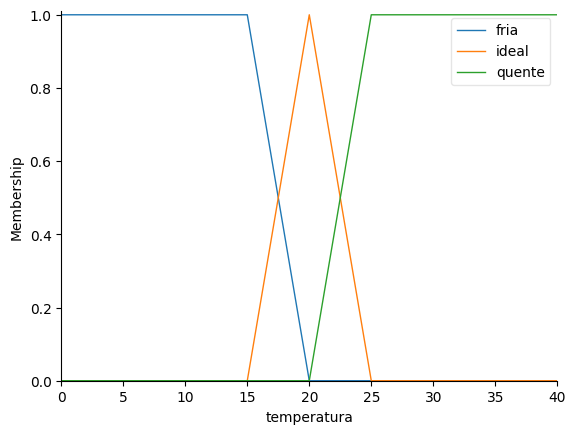

In [8]:
temperatura.view()

In [9]:
# Regras
regra1 = ctrl.Rule(temperatura_ambiente['fria'] & clima['chuvoso'], temperatura['quente'])
regra2 = ctrl.Rule(temperatura_ambiente['fria'] & clima['nublado'], temperatura['ideal'])
regra3 = ctrl.Rule(temperatura_ambiente['fria'] & clima['ensolarado'], temperatura['fria'])
regra4 = ctrl.Rule(temperatura_ambiente['moderada'] & clima['chuvoso'], temperatura['quente'])
regra5 = ctrl.Rule(temperatura_ambiente['moderada'] & clima['nublado'], temperatura['ideal'])
regra6 = ctrl.Rule(temperatura_ambiente['moderada'] & clima['ensolarado'], temperatura['ideal'])
regra7 = ctrl.Rule(temperatura_ambiente['quente'] & clima['chuvoso'], temperatura['quente'])
regra8 = ctrl.Rule(temperatura_ambiente['quente'] & clima['nublado'], temperatura['ideal'])
regra9 = ctrl.Rule(temperatura_ambiente['quente'] & clima['ensolarado'], temperatura['fria'])

# Sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])


In [10]:
simulacao = fuzz.control.ControlSystemSimulation(sistema_controle)

# Define as entradas do sistema de controle fuzzy
simulacao.input['clima'] = 60
simulacao.input['temperatura_ambiente'] = 20

# Computa o resultado da simulação
simulacao.compute()
# Defuzzifica a saída para obter um valor numérico
temperatura_ideal = simulacao.output['temperatura']
print(f'Temperatura ideal da piscina: {temperatura_ideal:.2f} °C')


Temperatura ideal da piscina: 20.00 °C


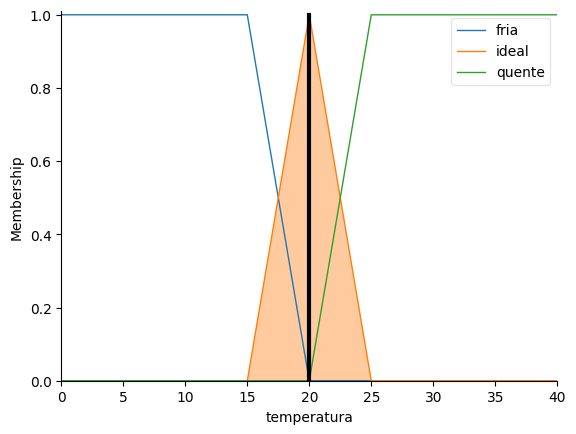

In [11]:
temperatura.view(sim=simulacao)